# 1 Intro

https://www.kaggle.com/c/digit-recognizer

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

### 1.1 Load libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.utils import plot_model

import tensorflow as tf

import os


### 1.2 Read in data

In [2]:
print(os.listdir('../Digit_Recognizer'))

train = pd.read_csv('../Digit_Recognizer/train.csv')
test = pd.read_csv('../Digit_recognizer/test.csv')


['test.csv', 'NumberRecognizer.ipynb', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']


### 1.3 Peak data


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2 Data Prepping

### 2.1 Labels and values

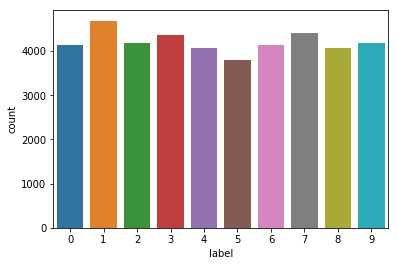

In [4]:
#Get labels and pixel values in separate dataframes
Y_train = train.label
X_train = train.drop(['label'], axis = 1)

#General distribution of labels
sns.countplot(Y_train)

### 2.2 Missing values

In [5]:
#Check for missing values. Any missing values would mean corrupted image data.

X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### 2.3 Greyscale normalization

"Reduces effect of illuminations differences"

Values now between 0,1 rather thatn 0, 255.

Now only one channel used(grey) as opposed to RGB images which have 3 channels.

In [6]:
X_train = X_train / 255.0

test = test / 255.0

In [7]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.4 Reshape images

They're 28 x 28 pixels as per the documaentation.

In [8]:
X_train = X_train.values.reshape(-1, 28, 28 , 1)
test = test.values.reshape(-1, 28, 28 ,1)

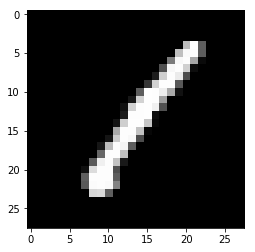

In [9]:
#Take a peak at reformatted images

plt.imshow(X_train[0][:,:,0], cmap=plt.get_cmap('gray'))

### 2.5 One-Hot Encoding

Change value of labels to be 10 new binary variables

https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [10]:
Y_train = to_categorical(Y_train)

### 2.6 Split data

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size = .8, random_state = 69)



/Users/drewpritchard/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
print("Shape of training feature matrix is {}".format(X_train.shape))
print("Shape of validation feature matrix is {}".format(X_val.shape))

print("Shape of training response matrix is {}".format(Y_train.shape))
print("Shape of validation response matrix is {}".format(Y_val.shape))


Shape of training feature matrix is (33600, 28, 28, 1)
Shape of validation feature matrix is (8400, 28, 28, 1)
Shape of training response matrix is (33600, 10)
Shape of validation response matrix is (8400, 10)


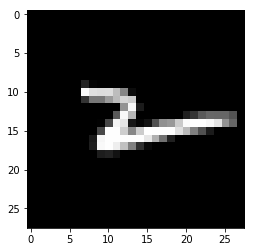

In [13]:
plt.imshow(X_train[0][:,:,0],cmap=plt.get_cmap('gray'))

# 3 Build CNN

In [14]:
X_train[0,0,0]

array([0.])

### 3.1 Sequential Model and its Layers

In [15]:

model = Sequential()

model.add(Conv2D(64, kernel_size = 3, input_shape = (28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


W0722 10:43:23.932738 4667020736 deprecation_wrapper.py:119] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 10:43:23.958505 4667020736 deprecation_wrapper.py:119] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 10:43:23.962382 4667020736 deprecation_wrapper.py:119] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 10:43:23.993146 4667020736 deprecation_wrapper.py:119] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d inste

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


### 3.2 Optimizer Function

In [17]:
#optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)



### 3.3 Compile the Model

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0722 10:43:24.113198 4667020736 deprecation_wrapper.py:119] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 10:43:24.200402 4667020736 deprecation_wrapper.py:119] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### 3.4 Fitting the Model

In [19]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 3)

W0722 10:43:24.424694 4667020736 deprecation.py:323] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0722 10:43:24.514928 4667020736 deprecation_wrapper.py:119] From /Users/drewpritchard/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 14s 412us/step - loss: 0.2477 - acc: 0.9266 - val_loss: 0.1091 - val_acc: 0.9687
Epoch 2/3
33600/33600 [==============================] - 12s 362us/step - loss: 0.0835 - acc: 0.9754 - val_loss: 0.0814 - val_acc: 0.9763
Epoch 3/3
33600/33600 [==============================] - 12s 366us/step - loss: 0.0612 - acc: 0.9816 - val_loss: 0.0834 - val_acc: 0.9737


# 4 Evaluation

### 4.1 Training and Validation Curves

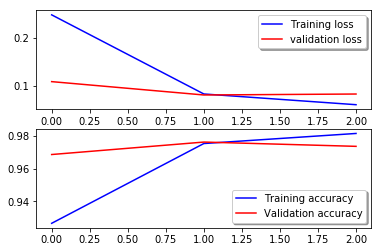

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### 4.2 Prediction Examples

In [69]:
guesses = model.predict_classes(X_val)

In [68]:
trues = []

for i in range(len(Y_val)):
    trues.append(Y_val[i].argmax())

trues = np.array(trues)

In [75]:
sum(guesses != trues) / 8400

0.02630952380952381

# 5 Submission

In [76]:
#Predictions of unlabeled test data
results = model.predict_classes(test)

In [91]:
#Format and export submission to csv
d = {'ImageId': range(1,28001), 'Label': results}

df = pd.DataFrame(data = d)

df.to_csv('MNIST_DigitRcognizer_Submission', index = False)